# Support Vector Regression

# China analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

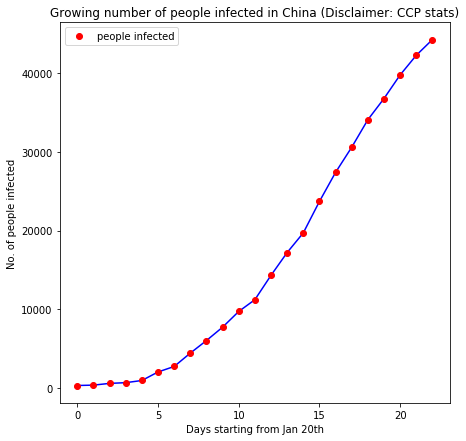

In [2]:
start = "Jan 20th" # start of keeping counts?
# current = "Feb 11th"
np_china = np.array([278, 326, 547, 639, 916, 2000, 2700, 4400, 6000, 7700, 9700, 11200, 14300, 17200, 19700, 23700, 27400, 
                     30600, 34100, 36800, 39800, 42300, 44300])

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected in China (Disclaimer: CCP stats)")

plt.plot(range(len(np_china)), np_china, 'b-')

for i in range(len(np_china)):
    a, = plt.plot(i, np_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Non-china analysis

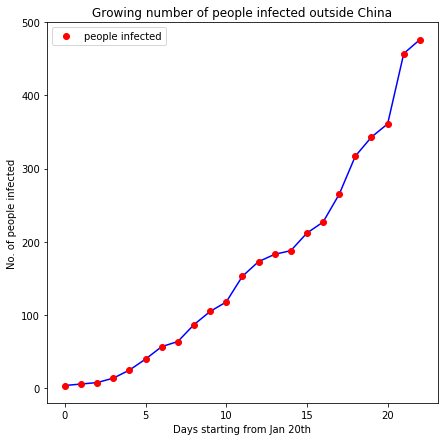

In [3]:
np_non = np.array([4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476])

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected outside China")

plt.plot(range(len(np_non)), np_non, 'b-')

for i in range(len(np_non)):
    a, = plt.plot(i, np_non[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

In [4]:
np_days = np.arange(1, len(np_china)+1)

# 2. Support Vector Machine

# A. Support Vector Regressor - Sklearn

In [5]:
from sklearn.svm import SVR

np_svr = SVR(kernel='rbf')
np_svr.fit(np_days.reshape(-1, 1), np_china.reshape(-1, 1))
np_pred = np_svr.predict(np_days.reshape(-1, 1))
np_pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([11198.6136814 , 11198.24580196, 11198.22748632, 11198.22736291,
       11198.2273628 , 11198.2273628 , 11198.2273628 , 11198.22736291,
       11198.22748643, 11198.24592548, 11198.63212056, 11200.        ,
       11201.36787944, 11201.75407452, 11201.77251357, 11201.77263709,
       11201.7726372 , 11201.7726372 , 11201.7726372 , 11201.77263709,
       11201.77251368, 11201.75419804, 11201.3863186 ])

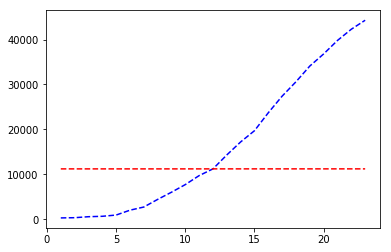

In [6]:
plt.plot(np_days, np_china, 'b--')
plt.plot(np_days, np_pred, 'r--')

# Applying a Standard Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scale_days, scale_china = StandardScaler(), StandardScaler()

std_days = scale_days.fit_transform(np_days.reshape(-1, 1))
std_china = scale_china.fit_transform(np_china.reshape(-1, 1))

std_days, std_china

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([[-1.6583124 ],
        [-1.50755672],
        [-1.35680105],
        [-1.20604538],
        [-1.05528971],
        [-0.90453403],
        [-0.75377836],
        [-0.60302269],
        [-0.45226702],
        [-0.30151134],
        [-0.15075567],
        [ 0.        ],
        [ 0.15075567],
        [ 0.30151134],
        [ 0.45226702],
        [ 0.60302269],
        [ 0.75377836],
        [ 0.90453403],
        [ 1.05528971],
        [ 1.20604538],
        [ 1.35680105],
        [ 1.50755672],
        [ 1.6583124 ]]), array([[-1.0735256 ],
        [-1.07032427],
        [-1.05558479],
        [-1.0494489 ],
        [-1.03097454],
        [-0.95867775],
        [-0.91199163],
        [-0.79861105],
        [-0.69189991],
        [-0.57851933],
        [-0.44513042],
        [-0.34508873],
        [-0.13833591],
        [ 0.05507802],
        [ 0.22181417],
        [ 0.488592  ],
        [ 0.7353615 ],
        [ 0.94878377],
        [ 1.18221437],
        [ 1.36228941],
        [ 

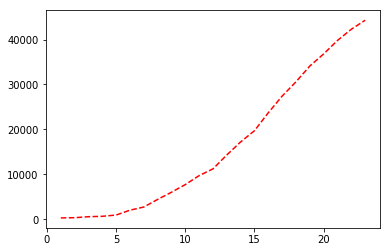

In [8]:
# comparing if standard scaler works to remove noise

plt.plot(np_days, np_china, 'r--')

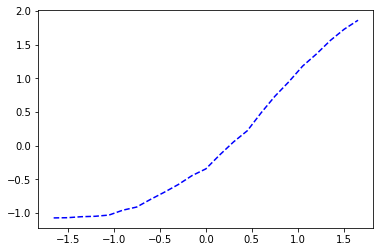

In [9]:
plt.plot(std_days, std_china, 'b--')

In [10]:
std_svr = SVR(kernel="rbf")
std_svr.fit(std_days.reshape(-1, 1), std_china.reshape(-1, 1))
std_pred = std_svr.predict(std_days.reshape(-1, 1))
std_pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.97390706, -1.01769109, -1.02824743, -1.00799348, -0.96160214,
       -0.89465537, -0.81237308, -0.71867946, -0.61569838, -0.50363237,
       -0.3809321 , -0.24470202, -0.09136024,  0.08239401,  0.27830323,
        0.49510501,  0.72723829,  0.96415758,  1.19069973,  1.38874089,
        1.54000775,  1.62948513,  1.64856106])

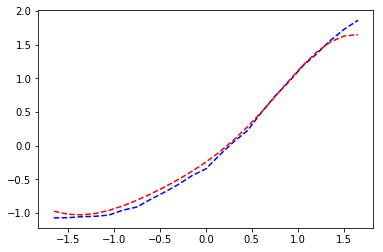

In [11]:
plt.plot(std_days, std_china, 'b--')
plt.plot(std_days, std_pred, 'r--')

In [12]:
inv_pred = scale_china.inverse_transform(std_svr.predict(scale_days.transform(np.arange(30).reshape(-1, 1))))
inv_pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 2913.09728521,  1771.65552389,  1115.16877191,   956.8896567 ,
        1260.57220841,  1956.15241393,  2959.93551418,  4193.65547712,
        5598.47410629,  7142.54665762,  8822.83634162, 10662.5734758 ,
       12705.17309748, 15004.3413472 , 17609.56901358, 20546.98273752,
       23797.65442817, 27278.20262892, 30830.51103414, 34227.22731601,
       37196.60681956, 39464.66419425, 40806.2656012 , 41092.28538623,
       40319.47359872, 38613.95121196, 36206.96055972, 33389.7835349 ,
       30460.46019554, 27676.11539904])

In [13]:
np_china[10:]

array([ 9700, 11200, 14300, 17200, 19700, 23700, 27400, 30600, 34100,
       36800, 39800, 42300, 44300])

In [14]:
std_china.shape, std_pred.shape

((23, 1), (23,))

In [15]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

ten = np.arange(np_days.shape[0] + 10)
std_ten = StandardScaler()
scale_ten = std_ten.fit_transform(ten.reshape(-1, 1))

pipe.fit(std_days.reshape(-1, 1), std_china.reshape(-1, 1))
pred = pipe.predict(scale_ten.reshape(-1, 1))
pred

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.9647346 , -1.00215496, -1.02334808, -1.02850645, -1.01856285,
       -0.99500441, -0.95964948, -0.91441965, -0.86113488, -0.80135048,
       -0.73624481, -0.66655662, -0.59256553, -0.51410705, -0.43061545,
       -0.34119215, -0.24470202, -0.13990265, -0.02561113,  0.09909146,
        0.2346264 ,  0.38067352,  0.53594709,  0.69802889,  0.86329828,
        1.02699353,  1.18342474,  1.326338  ,  1.44940511,  1.5467893 ,
        1.6137184 ,  1.64698868,  1.64532716])

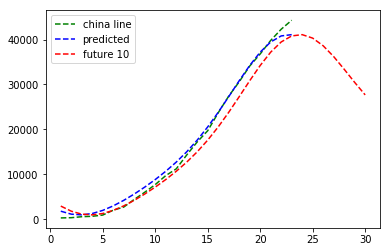

In [16]:
chiplt, = plt.plot(np_days, np_china, 'g--', label="china line")
preplt, = plt.plot(np_days, scale_china.inverse_transform(std_pred).reshape(-1, 1), 'b--', label="predicted")
futplt, = plt.plot(np.arange(1, 31), inv_pred, 'r--', label="future 10")
plt.legend(handles=[chiplt, preplt, futplt])
plt.show()

# B. Support Vector Machine - coded?